# plot spectrumgram at 512*512

In [1]:
import numpy as np
from scipy import signal
from scipy.fftpack import fftshift
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
folder_lst = ['/mnt/nas/skynet/data/captures/2400/dirty',
           '/mnt/nas/skynet/data/captures/2400/clean',
           '/mnt/nas/skynet/data/captures/5800/clean',
           '/mnt/nas/skynet/data/captures/5800/dirty']

In [106]:
folder = Path(folder_lst[3])
dat_path_gen = folder.glob('*.dat')
#for dat_path in dat_path_gen:
 #   print(str(path))

/mnt/nas/skynet/data/captures/5800/dirty/cap_usrp_ch_1_time_2019-03-22_02-51-12.dat


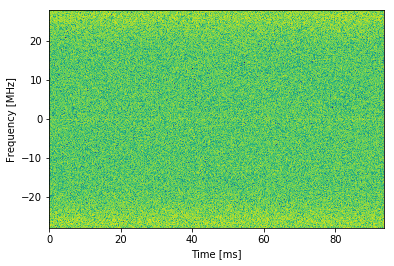

In [136]:
#file_path = 'my_device_2020_02_25_11_56_36.dat'
file_path = next(dat_path_gen)
print(str(file_path))
fs = 56e6

count = (4018 + 512 * 20 * 512) * 2

with open(file_path, 'rb') as f:
    raw = np.fromfile(f, dtype=np.int16, count=count, offset =4018)
data = raw[0::2] + 1j*raw[1::2]


nfft = 512
freq, t, Sxx = signal.spectrogram(data, nperseg=nfft, nfft=nfft, noverlap=0, fs=fs, return_onesided=False)
deci = 20
pxx = 10 * np.log10(Sxx[:, ::deci])
txx = t[::deci]
plt.pcolormesh(txx * 1000, fftshift(freq / 1e6), fftshift(pxx, axes=0))
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [ms]')
plt.show()

In [119]:
cap_lst.append(file_path)

In [64]:
nfft = 512
freq, t, Sxx = signal.spectrogram(data, nperseg=nfft, nfft=nfft, noverlap=0, fs=fs, return_onesided=False)
Sxx.shape

(512, 10240)

In [65]:
deci = 20
pxx = 10 * np.log10(Sxx[:, ::deci])
pxx.shape

(512, 512)

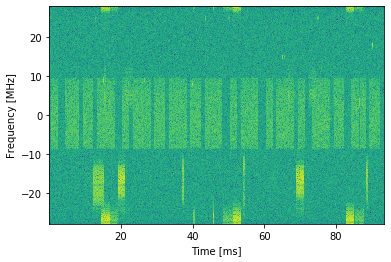

In [66]:
txx = t[::deci]
plt.pcolormesh(txx * 1000, fftshift(freq / 1e6), fftshift(pxx, axes=0))
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [ms]')
plt.show()

In [62]:
type(f)

numpy.ndarray